In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib.ticker import PercentFormatter
from sklearn import preprocessing

In [3]:
df_original = pd.read_csv("2013_Accidents_UK.csv")
df = pd.read_csv("2013_Accidents_UK.csv")
len(df_original.columns)


/var/folders/46/hsbxplj52vzglgl5v7brpmh00000gn/T/ipykernel_49387/4143528609.py:1: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  df_original = pd.read_csv("2013_Accidents_UK.csv")
/var/folders/46/hsbxplj52vzglgl5v7brpmh00000gn/T/ipykernel_49387/4143528609.py:2: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("2013_Accidents_UK.csv")


36

# Visualization

/Users/alaaabdelazeem/miniforge3/envs/tensorflow/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


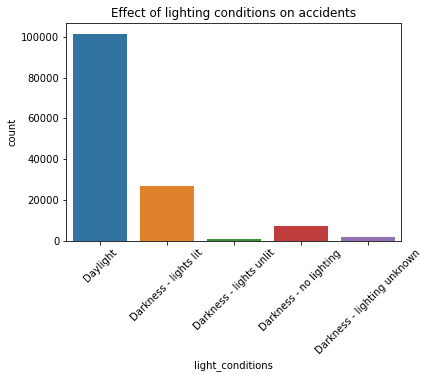

In [4]:
# To what extent does the light conditions effect the number of accidents
sns.countplot('light_conditions', data =df )
plt.title('Effect of lighting conditions on accidents')
plt.xticks(rotation=45)
plt.show()

/Users/alaaabdelazeem/miniforge3/envs/tensorflow/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


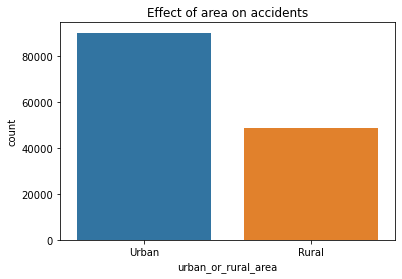

In [5]:
# To what extent does the area effect the number of accidents
sns.countplot('urban_or_rural_area', data =df )
plt.title('Effect of area on accidents')
plt.show()


/Users/alaaabdelazeem/miniforge3/envs/tensorflow/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


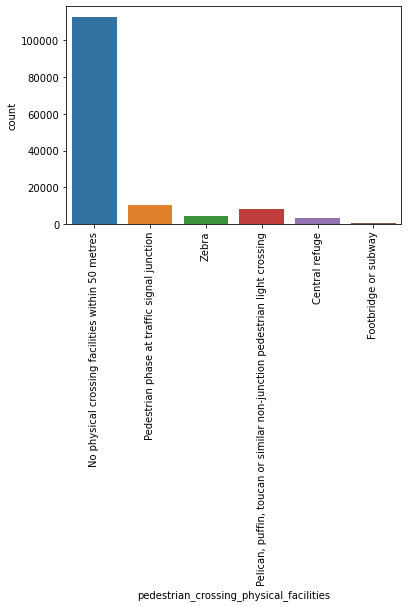

In [6]:
sns.countplot('pedestrian_crossing_physical_facilities', data =df )
plt.xticks(rotation=90)
plt.show()


/Users/alaaabdelazeem/miniforge3/envs/tensorflow/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


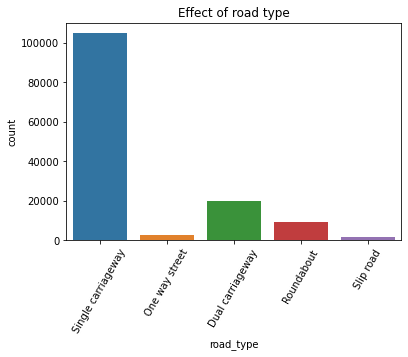

In [7]:
# To what extent does the area effect the number of accidents
sns.countplot('road_type', data =df )
plt.title('Effect of road type')
plt.xticks(rotation=60)
plt.show()

# Cleaning

In [8]:
# Cleaning Trunk Road Flag Column, Converting String to Boolean & Missing to Null
df['trunk_road_flag'] = df['trunk_road_flag'].replace('Non-trunk', False)
df['trunk_road_flag'] = df['trunk_road_flag'].replace('Trunk (Roads managed by Highways England)', True)
df['trunk_road_flag'] = df['trunk_road_flag'].replace('Data missing or out of range', np.nan)
df['trunk_road_flag']

0         False
1         False
2         False
3         False
4         False
          ...  
138655      NaN
138656      NaN
138657      NaN
138658      NaN
138659      NaN
Name: trunk_road_flag, Length: 138660, dtype: object

In [9]:
# Dropping the accident year coumn because all accidents occured in the same year
df = df.drop(['accident_year'], axis = 1)

In [10]:
# Columns should contain atomic properties that cannot be further decomposed
# split date to month & day. No need for year (all of them are in 2013).
df['date']=  pd.to_datetime(df['date'])
df["day"] = df['date'].map(lambda x: x.day)
df["month"] = df['date'].map(lambda x: x.month)
df.columns



/Users/alaaabdelazeem/miniforge3/envs/tensorflow/lib/python3.8/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '13/01/2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/alaaabdelazeem/miniforge3/envs/tensorflow/lib/python3.8/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '15/01/2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/alaaabdelazeem/miniforge3/envs/tensorflow/lib/python3.8/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '14/01/2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/alaaabdelazeem/miniforge3/envs/tensorflow/lib/pytho

Index(['accident_index', 'accident_reference', 'location_easting_osgr',
       'location_northing_osgr', 'longitude', 'latitude', 'police_force',
       'accident_severity', 'number_of_vehicles', 'number_of_casualties',
       'date', 'day_of_week', 'time', 'local_authority_district',
       'local_authority_ons_district', 'local_authority_highway',
       'first_road_class', 'first_road_number', 'road_type', 'speed_limit',
       'junction_detail', 'junction_control', 'second_road_class',
       'second_road_number', 'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'trunk_road_flag', 'lsoa_of_accident_location', 'day', 'month'],
      dtype='object')

In [11]:
# Urab/Rural. Converting String to Boolean. Urban => True, Rurla => False
df['urban_or_rural_area'].nunique()
df['urban_or_rural_area'].value_counts()
# No missing values only 2 unique values
df['urban_or_rural_area'] = df['urban_or_rural_area'].replace('Urban', True)
df['urban_or_rural_area'] = df['urban_or_rural_area'].replace('Rural', False)
df['urban_or_rural_area']

0          True
1          True
2          True
3          True
4          True
          ...  
138655    False
138656    False
138657    False
138658    False
138659    False
Name: urban_or_rural_area, Length: 138660, dtype: bool

In [12]:
df['accident_severity'].value_counts()

Slight     117467
Serious     19585
Fatal        1608
Name: accident_severity, dtype: int64

In [13]:
df['accident_severity'] = df['accident_severity'].replace('Fatal', 2)
df['accident_severity'] = df['accident_severity'].replace('Serious', 1)
df['accident_severity'] = df['accident_severity'].replace('Slight', 0)


In [14]:
df['carriageway_hazards'].replace('Data missing or out of range', np.nan)

0         None
1         None
2         None
3         None
4         None
          ... 
138655    None
138656    None
138657    None
138658    None
138659    None
Name: carriageway_hazards, Length: 138660, dtype: object

In [15]:
df['special_conditions_at_site'].unique()

array(['None', 'Road surface defective', 'Auto signal part defective',
       'Roadworks', 'Auto traffic signal - out', 'Mud', 'Oil or diesel',
       'Road sign or marking defective or obscured'], dtype=object)

In [16]:
df['lsoa_of_accident_location'].unique()

array(['E01002844', 'E01002821', 'E01002878', ..., 'W01000478',
       'W01000479', -1], dtype=object)

In [17]:
df_clean=df.copy()
df["road_surface_conditions"].unique() # 6 values including "Data missing or out of range"
df_clean.replace('Data missing or out of range', np.nan, inplace=True )
sum_null = df_clean.road_surface_conditions.isnull().mean()*100 #0.19% of data missing
sum_null

df["second_road_class"].nunique() # 7 values including "-1"
df_clean['second_road_class'].replace('-1', np.nan, inplace=True)
df_clean["second_road_class"].isnull().mean()*100 #40.302899177845084% null

#df["local_authority_district"].value_counts()
df["did_police_officer_attend_scene_of_accident"].unique() # 6 values including "Data missing or out of range'
df_clean['did_police_officer_attend_scene_of_accident'].replace('Data missing or out of range', np.nan, inplace=True)
df_clean["did_police_officer_attend_scene_of_accident"].isnull().sum() # 1 null column

df["lsoa_of_accident_location"].unique() 
df_clean['lsoa_of_accident_location'].replace('-1', np.nan, inplace=True)
df_clean['lsoa_of_accident_location'].replace(-1, np.nan, inplace=True)
df_clean["lsoa_of_accident_location"].value_counts() 
df_clean['lsoa_of_accident_location'].isnull().mean()*100

7.041684696379634

In [18]:
df_clean['second_road_class'].isna().mean()*100

40.302899177845084

In [19]:
df_clean['first_road_class'].isna().mean()*100

0.0

In [20]:
df_clean['first_road_class'], df_clean['second_road_class']

(0                    A
 1                    A
 2                    B
 3                    B
 4                    A
               ...     
 138655               A
 138656    Unclassified
 138657               A
 138658               C
 138659            A(M)
 Name: first_road_class, Length: 138660, dtype: object,
 0         Unclassified
 1                    A
 2                    B
 3                    C
 4         Unclassified
               ...     
 138655               B
 138656    Unclassified
 138657    Unclassified
 138658    Unclassified
 138659             NaN
 Name: second_road_class, Length: 138660, dtype: object)

In [21]:
df_clean['junction_detail'].unique()

array(['T or staggered junction', 'Crossroads',
       'More than 4 arms (not roundabout)',
       'Not at junction or within 20 metres', 'Mini-roundabout',
       'Roundabout', 'Private drive or entrance', 'Other junction',
       'Slip road', nan], dtype=object)

In [22]:
df_clean[df_clean['second_road_class'].isna()]['junction_detail'].value_counts()


Not at junction or within 20 metres    54683
Private drive or entrance                775
Other junction                           310
T or staggered junction                   72
Roundabout                                16
Crossroads                                11
Slip road                                  6
Mini-roundabout                            4
More than 4 arms (not roundabout)          1
Name: junction_detail, dtype: int64

In [23]:
# When 
# df_clean[df_clean['weather_conditions'] =='Raining no high winds']['road_surface_conditions'].value_counts()
df_clean['weather_conditions']
df['road_type'].value_counts()
# df_clean[df_clean['first_road_class']=='Motor']['road_type'].value_counts()


Single carriageway    104845
Dual carriageway       19751
Roundabout              9405
One way street          2744
Slip road               1423
Name: road_type, dtype: int64

In [24]:
df_clean[df_clean['lsoa_of_accident_location'].isna()]['latitude'].value_counts

<bound method IndexOpsMixin.value_counts of 1566      51.515825
1773      51.499457
2382      51.501783
5374      51.560070
5393      51.492484
            ...    
138655    55.077873
138656    54.988795
138657    55.332814
138658    55.009615
138659    55.336902
Name: latitude, Length: 9764, dtype: float64>

In [25]:
df_clean['lsoa_of_accident_location'].value_counts()

E01032739    206
E01004736    155
E01033595    108
E01004689     79
E01002444     71
            ... 
E01019523      1
E01019418      1
E01019625      1
E01019642      1
W01000479      1
Name: lsoa_of_accident_location, Length: 28785, dtype: int64

In [54]:

df_lsoa =  pd.DataFrame()
df_lsoa['max_longitude'] = df_clean.groupby(['lsoa_of_accident_location'])['longitude'].max()
df_lsoa['min_longitude'] = df_clean.groupby(['lsoa_of_accident_location'])['longitude'].min()
df_lsoa['max_latitude'] = df_clean.groupby(['lsoa_of_accident_location'])['latitude'].max()
df_lsoa['min_latitude'] = df_clean.groupby(['lsoa_of_accident_location'])['latitude'].min()
df_lsoa = df_lsoa.reset_index(level=0)



In [105]:
def locate_lsoa (longitude, latitude):
   x = df_lsoa[(df_lsoa['max_longitude'] >= longitude) & 
   (df_lsoa['min_longitude'] <= longitude) &
   (df_lsoa['max_latitude'] >= latitude) &
   (df_lsoa['min_latitude'] <= latitude)] 
   return x['lsoa_of_accident_location']


In [110]:
def locate_lsoa2 (row):
   x = df_lsoa[(df_lsoa['max_longitude'] >= row['longitude']) & 
   (df_lsoa['min_longitude'] <= row['longitude']) &
   (df_lsoa['max_latitude'] >= row['latitude']) &
   (df_lsoa['min_latitude'] <= row['latitude'])] 
   print(x['lsoa_of_accident_location'])
   if (x.empty):
      return "np..nan"
   # print('-----1------') 
   # print(x['lsoa_of_accident_location'].values[0])  
   # print('------2----') 
   return x['lsoa_of_accident_location'].values[0]


In [28]:
# lsoa_null_entries = df_clean[df_clean['lsoa_of_accident_location'].isna()]
# df_clean['edites_lsoa'] = df.apply(lambda row : locate_lsoa(row['longitude'],
#                      row['latitude']), axis = 1)
# df_clean['longitude'], df_clean['latitude'], df_clean['lsoa_of_accident_location']

#checking correctness- E01002844
df_lsoa[(df_lsoa['max_longitude'] >= -0.171402) & 
   (df_lsoa['min_longitude'] <= -0.171402) &
   (df_lsoa['max_latitude'] >= 51.486361) &
   (df_lsoa['min_latitude'] <= 51.486361)] 

,lsoa_of_accident_location,max_longitude,min_longitude,max_latitude,min_latitude
2351,E01002844,-0.167342,-0.173305,51.486622,51.482661


In [112]:
lsoa_null_entries = df_clean[df_clean['lsoa_of_accident_location'].isna()]
# lsoa_null_entries['latitude']
# lsoa_null_entries
# t = locate_lsoa(-0.175122, 51.515825 )
# t
lsoa_null_entries['edit'] = lsoa_null_entries.apply(locate_lsoa2, axis = 1)
lsoa_null_entries['edit']
             

3873    E01004682
Name: lsoa_of_accident_location, dtype: object
-----1------
E01004682
------2----
3915    E01004733
Name: lsoa_of_accident_location, dtype: object
-----1------
E01004733
------2----
3879    E01004689
3882    E01004692
Name: lsoa_of_accident_location, dtype: object
-----1------
E01004689
------2----
Series([], Name: lsoa_of_accident_location, dtype: object)
Series([], Name: lsoa_of_accident_location, dtype: object)
3522    E01004261
Name: lsoa_of_accident_location, dtype: object
-----1------
E01004261
------2----
Series([], Name: lsoa_of_accident_location, dtype: object)
1948    E01002372
Name: lsoa_of_accident_location, dtype: object
-----1------
E01002372
------2----
1948    E01002372
Name: lsoa_of_accident_location, dtype: object
-----1------
E01002372
------2----
Series([], Name: lsoa_of_accident_location, dtype: object)
Series([], Name: lsoa_of_accident_location, dtype: object)
Series([], Name: lsoa_of_accident_location, dtype: object)
Series([], Name: lsoa_of_acc

/var/folders/46/hsbxplj52vzglgl5v7brpmh00000gn/T/ipykernel_49387/162227687.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lsoa_null_entries['edit'] = lsoa_null_entries.apply(locate_lsoa2, axis = 1)


1566      E01004682
1773      E01004733
2382      E01004689
5374        np..nan
5393        np..nan
            ...    
138655      np..nan
138656      np..nan
138657      np..nan
138658      np..nan
138659      np..nan
Name: edit, Length: 9764, dtype: object

In [117]:
lsoa_null_entries['edit'] = lsoa_null_entries['edit'].replace('np..nan', np.nan)
lsoa_null_entries['edit']

/var/folders/46/hsbxplj52vzglgl5v7brpmh00000gn/T/ipykernel_49387/3261929942.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lsoa_null_entries['edit'] = lsoa_null_entries['edit'].replace('np..nan', np.nan)


1566      E01004682
1773      E01004733
2382      E01004689
5374            NaN
5393            NaN
            ...    
138655          NaN
138656          NaN
138657          NaN
138658          NaN
138659          NaN
Name: edit, Length: 9764, dtype: object